Instalação: `pip install fbprophet`


- Seasonality

- Changing growth rate

- Special days

In [1]:
import matplotlib

matplotlib.use('TkAgg')

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 9)

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/facebookincubator/prophet/master/examples/example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [5]:
m = Prophet()
m.fit(df)

In [6]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.213787,7.491678,8.985711
3266,2017-01-16,8.538876,7.809311,9.307750
3267,2017-01-17,8.326293,7.589562,9.085817
3268,2017-01-18,8.158930,7.429870,8.871102
3269,2017-01-19,8.170898,7.467642,8.959222


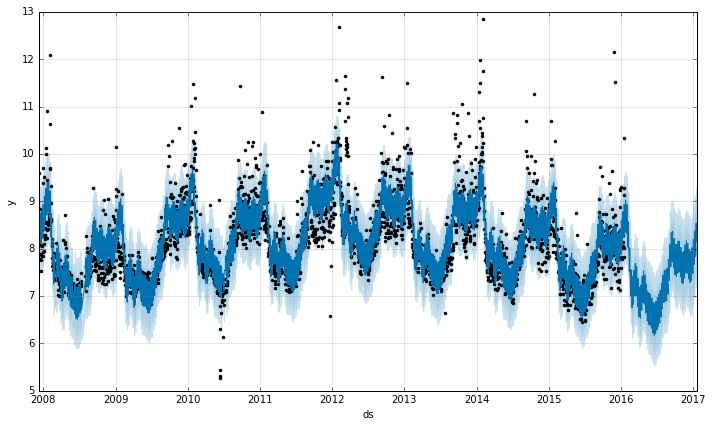

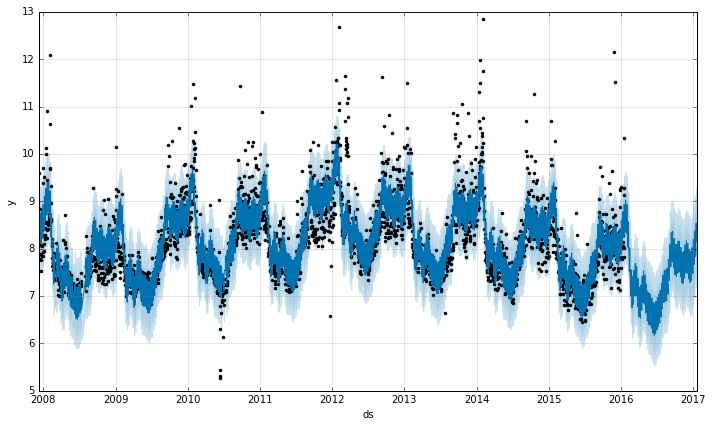

In [8]:
m.plot(forecast)

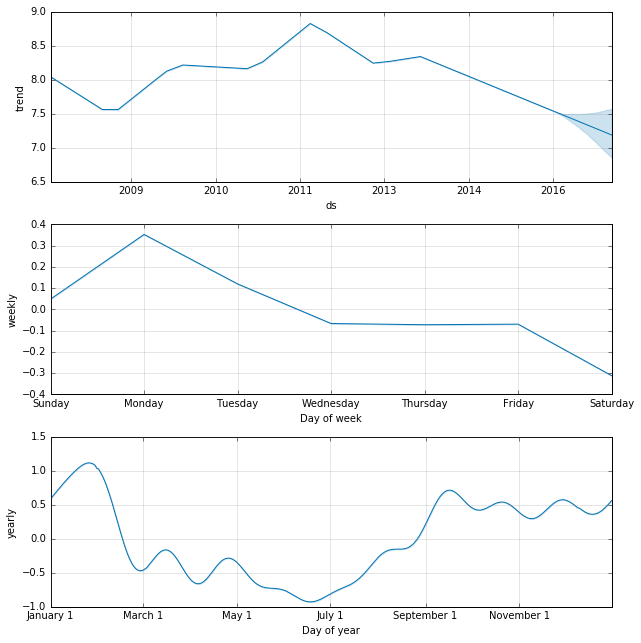

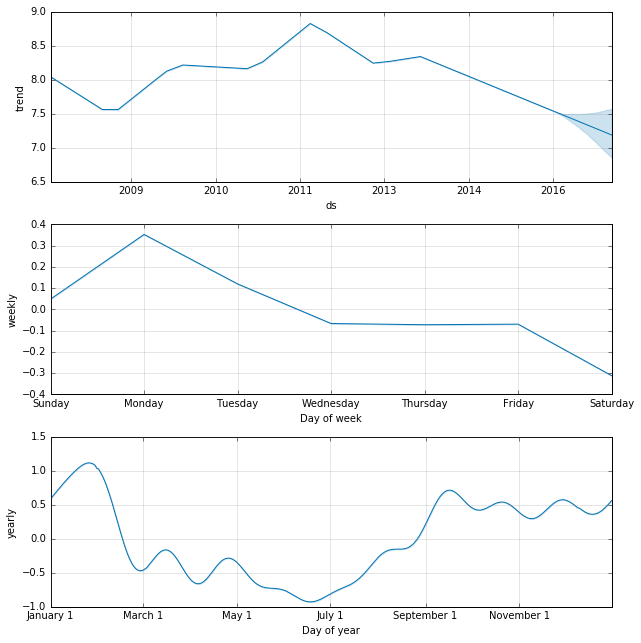

In [9]:
m.plot_components(forecast)

Forecasting Growth

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/facebookincubator/prophet/master/examples/example_wp_R.csv')
import numpy as np
df['y'] = np.log(df['y'])

In [11]:
df['cap'] = 8.5

In [18]:
m = Prophet(growth='logistic')
m.fit(df)

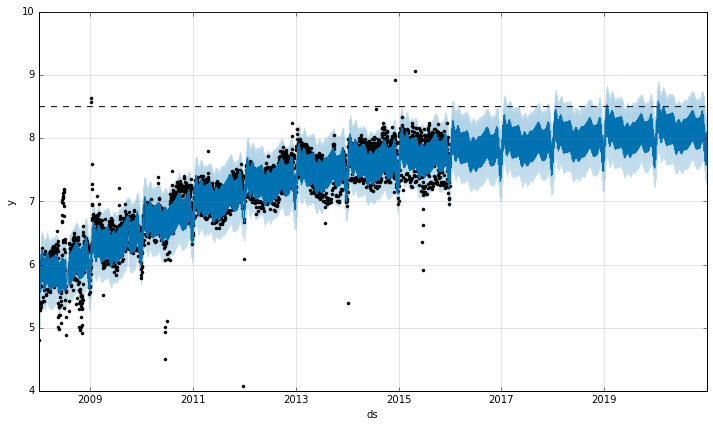

In [19]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

In [14]:
m = Prophet(growth='linear')
m.fit(df)

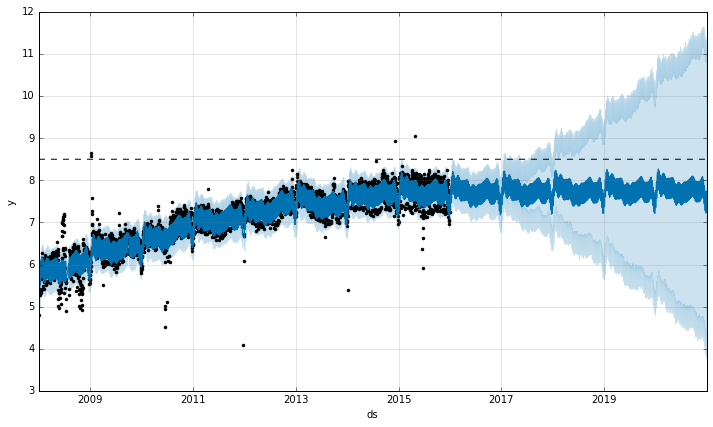

In [15]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

Trend Changepoints

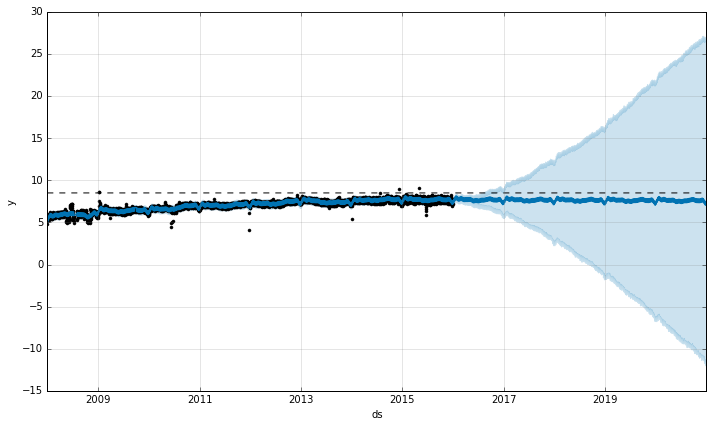

In [20]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
m.plot(forecast);

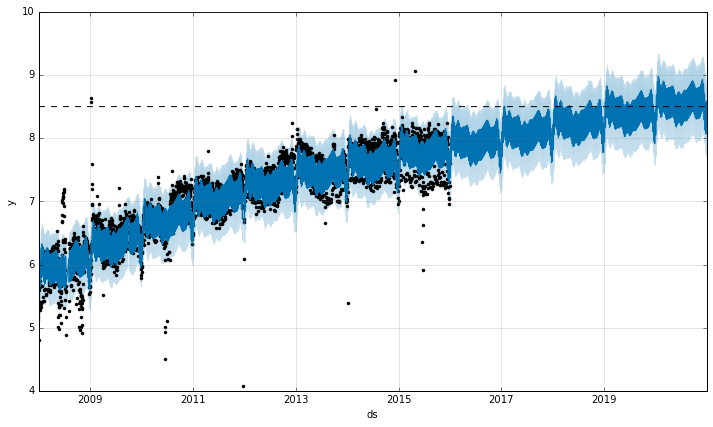

In [21]:
m = Prophet(changepoint_prior_scale=0.001)
forecast = m.fit(df).predict(future)
m.plot(forecast);

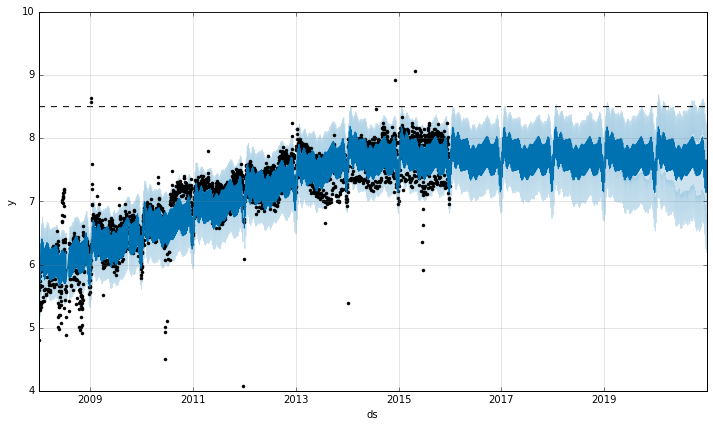

In [22]:
m = Prophet(changepoints=['2014-01-01'])
forecast = m.fit(df).predict(future)
m.plot(forecast);

In [23]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [24]:
m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)

In [25]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
        ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2168,2014-02-02,0.040799,0.077609
2169,2014-02-03,0.027547,-0.017903
2510,2015-01-11,0.040799,0.000000
2511,2015-01-12,0.027547,0.000000
2879,2016-01-17,0.040799,0.000000
2880,2016-01-18,0.027547,0.000000
2886,2016-01-24,0.040799,0.000000
2887,2016-01-25,0.027547,0.000000
2900,2016-02-07,0.040799,0.077609
2901,2016-02-08,0.027547,-0.017903


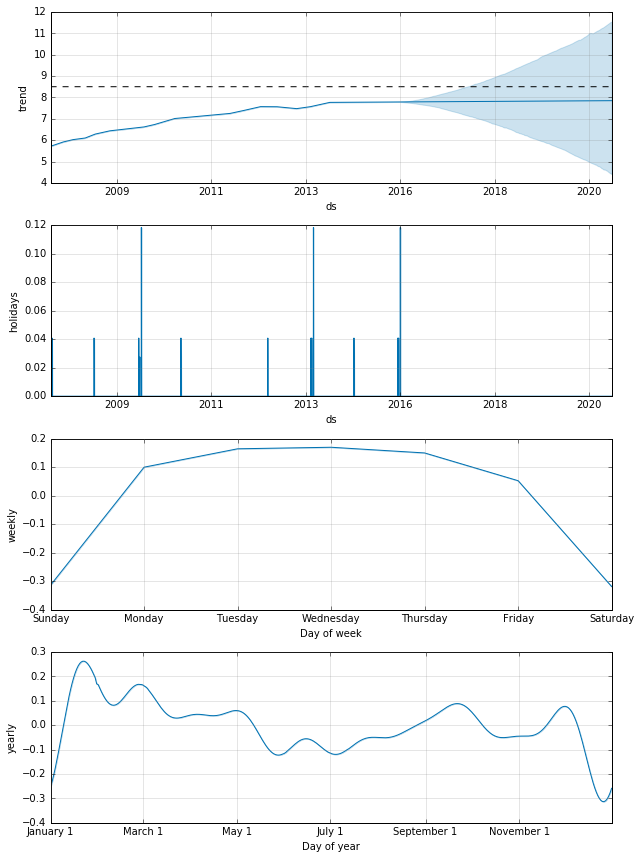

In [26]:
m.plot_components(forecast);

In [27]:
m = Prophet(holidays=holidays, holidays_prior_scale=1).fit(df)
forecast = m.predict(future)
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][
    ['ds', 'playoff', 'superbowl']][-10:]

,ds,playoff,superbowl
2168,2014-02-02,0.041977,0.075214
2169,2014-02-03,0.027315,-0.013917
2510,2015-01-11,0.041977,0.000000
2511,2015-01-12,0.027315,0.000000
2879,2016-01-17,0.041977,0.000000
2880,2016-01-18,0.027315,0.000000
2886,2016-01-24,0.041977,0.000000
2887,2016-01-25,0.027315,0.000000
2900,2016-02-07,0.041977,0.075214
2901,2016-02-08,0.027315,-0.013917


Uncertainty Intervals

In [28]:
forecast = Prophet(interval_width=0.95).fit(df).predict(future)

In [ ]:
m = Prophet(mcmc_samples=500)
forecast = m.fit(df).predict(future)

In [ ]:
m.plot_components(forecast);

Outliers

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/facebookincubator/prophet/master/examples/example_wp_R_outliers1.csv')
df['y'] = np.log(df['y'])
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1096)
forecast = m.predict(future)
m.plot(forecast);

In [ ]:
df.loc[(df['ds'] > '2010-01-01') & (df['ds'] < '2011-01-01'), 'y'] = None
model = Prophet().fit(df)
model.plot(model.predict(future));

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/facebookincubator/prophet/master/examples/example_wp_R_outliers2.csv')
df['y'] = np.log(df['y'])
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1096)
forecast = m.predict(future)
m.plot(forecast);

In [ ]:
df.loc[(df['ds'] > '2015-06-01') & (df['ds'] < '2015-06-30'), 'y'] = None
m = Prophet().fit(df)
m.plot(m.predict(future));

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/facebookincubator/prophet/master/examples/example_retail_sales.csv')
m = Prophet().fit(df)
future = m.make_future_dataframe(periods=3652)
fcst = m.predict(future)
m.plot(fcst);

In [ ]:
future = m.make_future_dataframe(periods=120, freq='M')
fcst = m.predict(future)
m.plot(fcst);